In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision as tv
from PIL import Image

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

C:\Users\admin\AppData\Local\Temp\ipykernel_13704\546151212.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
#classes=pd.read_csv('classes.csv',index_col=0)
df_train=pd.read_csv('train_cc.csv')
#df_test=pd.read_csv('test_cc.csv')

In [27]:
classes.head()

,brand,model,id
0,new balance,57/40,0
1,new balance,247,1
2,new balance,574,2
3,new balance,new balance fresh foam roav,3
4,new balance,new balance 574,4


In [28]:
classes.dtypes

brand    object
model    object
id        int64
dtype: object

In [4]:
df_train.head() 

,class_id,image
0,1221,3kVLfN1tTupzPhFgWY0yeOnqoD6RwG57HlSMvBK4.jpg
1,1209,p5FeqKS7BHknQM4OvbzZs60giLthaCW83VGDx1Y9.jpg
2,865,3GHsrhop0FJ58EBjLDgQed2NvI4UK1ybZRAuTl6n.jpg
3,1222,DqoLbEG8A9lJCaR7ucOdiP05rXxyjg4WwMSh2VFs.jpg
4,542,TV1zBo5gLt34i76pAFya90HuJWNjkZSCwbKDevnO.jpg


In [10]:
df_train.shape

(40428, 2)

In [31]:
df_train.dtypes

class_id     int64
image       object
dtype: object

In [3]:
df_train.isna().any()

class_id    False
image       False
dtype: bool

In [ ]:
corrupted_images = []
path = 'C:\imgCLF\images'
images = os.listdir(path)
for img in images:
    try:
        Image.open(os.path.join(path, img))
    except:
        corrupted_images.append(img)

In [4]:
corrupted_images

['3NK1l9tEvhp7ZdroLPRmeHnCg8WaA4FfqDyk5Ywb.jpg',
 '7GOswlbQD9nz5EPB1NCRgqSkeLiUAxf3Im0jua64.jpg',
 'BunpXaDiFChjE79yHgcNz5kTMJZwlYQRmUIteK6A.jpg',
 'DQCKsEr0H289cm1uBXxd4pwgAN6eTVYOioztSUh5.jpg',
 'gTzMpvSEl9Q6ysXUw5J34LWfhqZYij0BCmaHIxkN.jpg',
 'JZ6hfD8we1pbKzoIjsCBcrq9vx0SAV2LgOXPlmQt.jpg',
 'kJnjQNuyBFSc97ADdRLKXIMhxzaUfpEg1245owm3.jpg',
 'L0FTwXANjMdVIp52EneavWzr1tHBkQSUxhlc4P8y.jpg',
 'lnakNgDdKCeHcxwzoB18STLRUqfMyj3Xb7J0IY9u.jpg',
 'MmzGWSNOAlBnTKe2L5qkaHv3x8EZt9hrpIyf4wQi.jpg',
 'moBOxq9vVZ4cThRlLai5gpeKu1M6EIbwYS3XnGtd.jpg',
 'N7umUCgAXvezioWd4sGbRS0FjOT6ZEnIlqtyMKPV.jpg',
 'O1PL3Zo8r9GbVIefWvcgxzdSwahuUMi70DpT5t6l.jpg',
 'PvOexEcYnNqmFgZjd0Bi5DQR19wfXGAzyC8T7HVu.jpg',
 'pVqSwW1hkPF2fMRTcK5bLIt9nzJiOgseAZ7ByXNd.jpg',
 'sEfRPD3dXIhBeSoNa4qkLb1Zx7085jgnt9QTlpmC.jpg',
 't1lhqgVMQBbUoZ9y8FXNiOR2Ijva7cDmwWE5S6Ln.jpg',
 'TtE19pNKoqDf236iwrceIhdP5sCXSBZjmG8ybWv7.jpg',
 'vm8OYszIhfeDAEVcZRxlFtyGHidpKW2SQ5J7bNXn.jpg',
 'zZincdB31eoSgNKbHIuJatksxQV0ArjYqE8yDFU5.jpg']

In [7]:
with open('corrupted_images.txt', 'w') as file:
    for item in corrupted_images:
        file.write("%s\n" % item)

In [3]:
with open('corrupted_images.txt', 'r') as file:
    corrupted_images = file.read().splitlines()

In [5]:
df_train = df_train[~df_train['image'].isin(corrupted_images)]
df_train = df_train.dropna()
#df_test = df_test[~df_test['image'].isin(corrupted_images)]
#df_test = df_test.dropna()

In [6]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_train, test_size=0.15)

In [7]:
def img_to_label(df):
    filename_to_label = {}
    for i in range(len(df)):
        filename = df.iloc[i]['image']
        class_id = df.iloc[i]['class_id']
        filename_to_label[filename] = class_id
    return filename_to_label        

In [8]:
filename_to_label_train = img_to_label(df_train)
filename_to_label_test = img_to_label(df_test)

In [30]:
filename_to_label_train

{'ZTFcXsYuWbMlHotxepUrC9DfdVBL6IE54Qv0GSw8.jpg': 1747,
 'f7TSeK4HYG2hUD9cPsLWX1Jtdkv8wmElzNR5nIja.jpg': 1404,
 'gKBCNJYDOk8V6b0M5Rwy1qIQameUr2tpXA4c7Ejo.jpg': 416,
 'VpRYn5a4zjTDWBuCdOZlkoX7g3eMSmJIU91PywtF.jpg': 952,
 'fslCAKjtNhHFZYTze6qpVnEM0I14UBX7GRJyaSok.jpg': 1881,
 'azBoZjyOqdpA4lfkI65wmrg3DEnUQNi8Fu2hPtH9.jpg': 619,
 'Z81g6niztXrS2CjOKVAhaHoJLsywF7dmbk9c3B4U.jpg': 2224,
 'qn8ruBLvlWVNKefHaU6hPISZFJib097ypGYXQ4mc.jpg': 41,
 'UQEXFMPcDOCWf0rwx8Jn1miHyjkASlzVN4YdG97u.jpg': 3929,
 'FG0Z2bXTdBOVHj73fnky5PwASJvhRog6cziQuY49.jpg': 3521,
 'FI15mbC3y6KxhO2UlBTrtQScWqZLuzJdkYGXHafi.jpg': 2152,
 '2tXFgKuGzUWjLCJvE758pIl3eaRHSomwhdZOBTMr.jpg': 4,
 'I05vuUTGRLsZKdi1JWSXajmOQ2oVrkl4Ywe6PnBD.jpg': 3083,
 'ZRSOHXb6fu8gNWVGQJK2opL9FDv31Is4e0rEckYC.jpg': 71,
 '85fe47BJs6McUbYt3vXd90CHjSOrDonkRgmzVhQZ.jpg': 4268,
 '0JBsrzWNEHmPc5gydkY9bqGxh8nTDiM3OZ4KawCe.jpg': 733,
 'Rk8WXeATVBz0NbJw9Imt6c2Q4qovyDiOYpPZnrh5.jpg': 101,
 'a9i3CucP61XBmHFVWQOI2gkejlvwNbh5GU7zdysJ.jpg': 218,
 'LXrKUPq6a7dBZ8bToecGF

In [10]:
data_transforms = {
    'train': tv.transforms.Compose([
        tv.transforms.RandomResizedCrop(244),
        tv.transforms.RandomHorizontalFlip(),
        tv.transforms.ToTensor(),
        tv.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': tv.transforms.Compose([
        tv.transforms.Resize(256),
        tv.transforms.CenterCrop(244),
        tv.transforms.ToTensor(),
        tv.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [11]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, filename_to_label, transform=None):
        self.data_dir = data_dir
        self.filename_to_label = filename_to_label
        self.transform = transform

    def __len__(self):
        return len(self.filename_to_label)    
        
    def __getitem__(self, index):
        filename = list(self.filename_to_label.keys())[index]
        label = torch.tensor(self.filename_to_label[filename])
        img_path = os.path.join(self.data_dir, filename)
        
        with open(img_path, 'rb') as f:
            img = Image.open(f).convert('RGB')
            
        if self.transform:
            img = self.transform(img)
        return img, label

In [8]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, filename_to_label, transform=None):
        self.data_dir = data_dir
        self.filename_to_label = filename_to_label
        self.transform = transform

    def __len__(self):
        return len(self.filename_to_label)    
        
    def __getitem__(self, index):
        filename = list(self.filename_to_label.keys())[index]
        label = torch.tensor(self.filename_to_label[filename])
        img_path = os.path.join(self.data_dir, filename)
        
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.astype(np.float32)
        img = img/255.0
            
        if self.transform:
            img = self.transform(img)
        return img, label

In [12]:
train_dataset = CustomDataset('C:\imgCLF\images', filename_to_label_train, transform=data_transforms['train'])
test_dataset = CustomDataset('C:\imgCLF\images', filename_to_label_test, transform=data_transforms['val'])

In [13]:
train_dataset[0]

(tensor([[[-1.9124, -1.9295, -1.9467,  ...,  1.8550,  1.8550,  1.8722],
          [-1.8782, -1.8953, -1.9467,  ...,  1.8379,  1.8722,  1.8893],
          [-1.8268, -1.8782, -1.9467,  ...,  1.8379,  1.8722,  1.8722],
          ...,
          [ 1.8379,  1.8379,  1.8379,  ...,  1.6324,  1.6495,  1.6495],
          [ 1.8208,  1.8379,  1.8208,  ...,  1.6324,  1.6495,  1.6495],
          [ 1.8208,  1.8379,  1.8379,  ...,  1.6495,  1.6495,  1.6495]],
 
         [[-1.8606, -1.8782, -1.8957,  ...,  2.0259,  2.0259,  2.0434],
          [-1.8256, -1.8431, -1.8957,  ...,  2.0084,  2.0434,  2.0609],
          [-1.7731, -1.8256, -1.8957,  ...,  2.0084,  2.0434,  2.0434],
          ...,
          [ 1.9734,  1.9734,  1.9734,  ...,  1.7633,  1.7808,  1.7808],
          [ 1.9559,  1.9734,  1.9559,  ...,  1.7633,  1.7808,  1.7808],
          [ 1.9559,  1.9734,  1.9734,  ...,  1.7808,  1.7808,  1.7808]],
 
         [[-1.5779, -1.5953, -1.6127,  ...,  2.2740,  2.2740,  2.2914],
          [-1.5430, -1.5604,

In [14]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, drop_last=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=True, drop_last=False)

In [15]:
len(train_dataloader)

2526

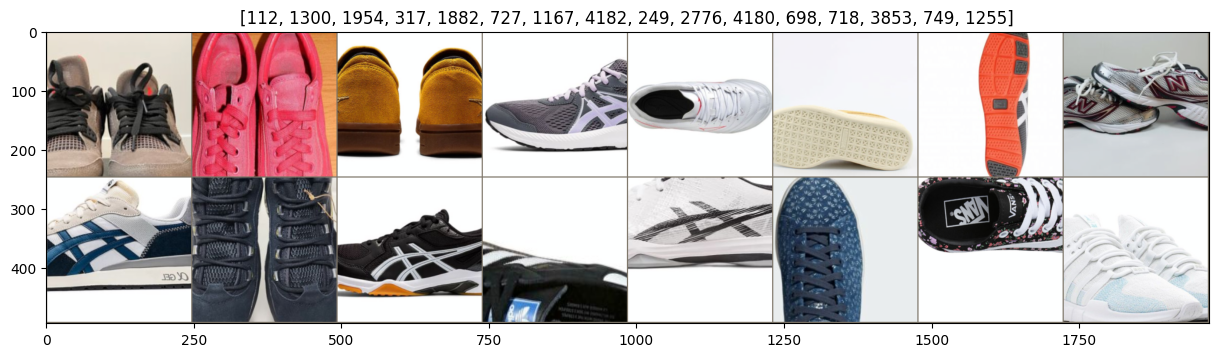

In [35]:
class_names = list(filename_to_label_train.values())

def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15, 12))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


inputs, classes = next(iter(train_dataloader))

out = tv.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [19]:
model = tv.models.densenet121(weights=tv.models.DenseNet121_Weights)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [20]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [28]:
class classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(2048,1024)
        self.linear2 = nn.Linear(1024,512)
        self.linear3 = nn.Linear(512,256)
        self.linear4 = nn.Linear(256,2048)
        self.act = nn.LeakyReLU(0.2)
        
    def forward(self, x):
        out = self.flatten(x)
        out = self.linear1(out)
        out = self.act(out)
        out = self.linear2(out)
        out = self.act(out)
        out = self.linear3(out)
        out = self.act(out)
        out = self.linear4(out)
        
        return out

model.classifier = classifier    

In [21]:
classifier = nn.Sequential(
    nn.Linear(1024, 512),
    nn.LeakyReLU(0.2),
    nn.Linear(512, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256,128),
    nn.LeakyReLU(0.2),
    nn.Linear(128,4396)
)
model.classifier = classifier

In [22]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [23]:
count_parameters(model)

8209964

In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.001, betas=(0.9, 0.999))

In [25]:
from sklearn.metrics import matthews_corrcoef

num_epochs = 10

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
loss_fn = loss_fn.to(device)

losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    
    for batch_idx, (data, target) in enumerate(tqdm(train_dataloader)):

        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        output = model(data)

        target_one_hot = torch.nn.functional.one_hot(target, num_classes=4396)
        
        target_index = torch.argmax(target_one_hot, dim=1)
        
        loss = loss_fn(output, target_index)

        #loss = loss_fn(output, target_one_hot.float())
        
        loss_item = loss.item()
        
        running_loss += loss_item
        
        losses.append(running_loss)

        loss.backward()

        optimizer.step()

    model.eval()
    with torch.no_grad():
        test_preds = []
        test_targets = []
        for data_test, target_test in test_dataloader:
            data_test, target_test = data_test.to(device), target_test.to(device)

            output = model(data_test)

            preds = torch.argmax(output, dim=1)
            test_preds += preds.flatten().tolist()
            test_targets += target_test.flatten().tolist()

        matth_corr = matthews_corrcoef(test_targets, test_preds)  
print(f"loss = {losses[-1]}/{len(train_loader)}")        
print(f"matthews_corrcoef = {matth_corr:.3f}")


  0%|          | 0/2526 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [26]:
print(torch.cuda.is_available())

False
